# <font color=darkred><center>CLAREYAMAR <br>
### <font color=gold><center>Clara Lelis, Yasmin Shimizu, Gabriel Martins<br>
 <font color=darkred><center>*Inluminans Ignotus*☀️🌊
 
<font color=black><center>Divisão responsável pela segurança das águas territoriais e regiões portuárias do reino de Lumi, iluminando a escuridão dos mares e as profundezas do oceano.
### <font color=blue><center> Quests 1
<font color=black><center> Nos seus primeiros dias em Lumi, a divisão Clareyamar visitou a Taverna do Sol, buscando possíveis informações sobre o despertar de seus poderes de luz e a localização do deus Pheabus. Assim, o grupo descobre a cultura dos Murais de Quests e decidem ajudar a população local com seus pedidos, visando conhecer melhor a região, os seus habitantes e adquirir mais informações para sua missão principal de libertação da Aurora de Netuno.
    
##### <font color=darkred><center> Missão 4: Ordinal ou One-Hot?
<div class="alert alert-warning">
<center> "Escolha um conjunto de dados qualquer que contenha pelo menos uma coluna com dados categóricos que não sejam binários (isto é, não podem ser dados com apenas dois rótulos possíveis). Faça uma conversão simbólico-numérica neste conjunto de dados utilizando o codificador ordinal se possível. Se não for possível, utilize o codificador one-hot. 
    
<center>Observe que “ser possível” quer dizer “ser tecnicamente correto” neste caso, não basta seu código executar sem erros, é importante nque você reflita se sua variável categórica é ordinal ou nominal"
</div>
    
<font color=darkred><center> Introdução da missão 4<br>
<font color=black> Alguns dados não são expressados por informações numéricas, tendo isso em vista a divisão Clareyamar realizou a analise dos dados observados no treinamento de seus membros a fim de ajudar a Senhorita Creizuda, utilizando o dataset Exercise e observando o tipo de exercício realizado descrito na coluna "kind".

In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import statistics as st

In [2]:
treinamento=sb.load_dataset("exercise")
treinamento.head(3)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest


<font color=black> Os tipos de exercicio abrangidos são "rest", "walking" e "running", sendo possível inferir uma ordem nesses dados, parado/rest=0, caminhando/walking=1, correndo/running=2, logo a melhor escolha é o codificador ordinal.

In [3]:
from sklearn.preprocessing import OrdinalEncoder

In [4]:
exercicios=treinamento["kind"].values.reshape(-1, 1)
ordem=[["rest", "walking", "running"]] 
encoder=OrdinalEncoder(categories=ordem)
encoder.fit(exercicios)
conversão=encoder.transform(exercicios)

In [5]:
print("Dados convertidos:")
print(conversão)

Dados convertidos:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [6]:
desconversão=encoder.inverse_transform(conversão)
print("Dados deconvertidos:")
print(desconversão)

Dados deconvertidos:
[['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['rest']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['walking']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['running']
 ['

In [7]:
tipo={"rest":0,
"walking":0,
"running":0}
for i in conversão:
    if i==[0]:
        tipo["rest"]+=1
    if i==[1]:
        tipo["walking"]+=1
    if i==[2]:
        tipo["running"]+=1
print(tipo)

{'rest': 30, 'walking': 30, 'running': 30}


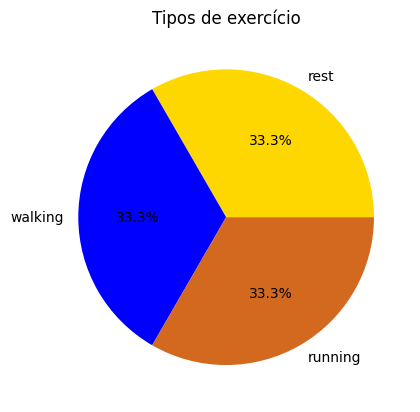

In [8]:
eixo_y=tipo.keys()
eixo_x=tipo.values()
plt.pie(eixo_x,labels=eixo_y, colors = ["gold","blue","chocolate"], autopct = "%1.1f%%")
plt.title("Tipos de exercício")
plt.show()

In [9]:
#conversão dos dados para uma lista a fim de calcular algumas estatísticas descritivas
lista=[]
for i in conversão:
    lista+=list(i)
media=st.mean(lista)
desvio=st.pstdev(lista)
print('Média:',media)
print('Desvio Padrão:',desvio)

Média: 1.0
Desvio Padrão: 0.816496580927726


<font color=darkred>Conclusão da missão 4<br>
<font color=black> Assim, é possivel concluir que, neste dataset, há a mesma quantidade de exercícios de cada tipo, e que a conversão para codificadres ordinais é simples para momentos como este onde há apenas três opções de exercício, além de ser muito útil para analisar estatísticas descritivas observadas apenas em dados numéricos como a média e o desvio padrão.

### <font color=darkred>Referências
 
CASSAR, DR. ATP-203 1.1 Tratamento de dados. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.
 
CASSAR, DR. ATP-203 3.0 Modelo linear e baseline. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.
tem menu de contexto

WASKOM, M. seaborn-data: Data repository for seaborn examples. [s.l: s.n.].
